In [24]:
import tensorflow as tf
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from data import get_data

# Evaluation on M-FER2013

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.41it/s]


confusion_matrix on M-FER2013 :


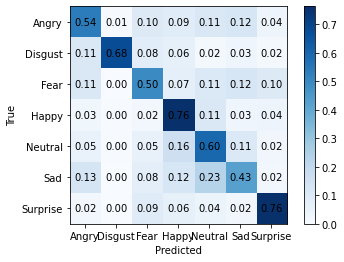

overall accuracy: 0.6188850967007964


In [25]:
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# load the pre-trained model
model = tf.keras.models.load_model('../models/mfer_best')
# load the dataset
test_set='../datasets/M-FER2013_cropped/test'
x, y = get_data(test_set)
truth=y
y = to_categorical(y).reshape(y.shape[0], -1)


# make predictions on the test set
prediction=model.predict(x)
prediction=tf.argmax(prediction, axis=1)


# compute the confusion_matrix
confusion_matrix_fer=confusion_matrix(truth, prediction)
# Calculate the total sample size for each category
class_totals = np.sum(confusion_matrix_fer, axis=1)
# Normalise the confusion matrix to a range between 0 and 1
confusion_matrix_fer = confusion_matrix_fer / class_totals[:, np.newaxis]


# Visualize the confusion matrix
plt.imshow(confusion_matrix_fer, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, "{:.2f}".format(confusion_matrix_fer[i, j]), ha='center', va='center')


print('confusion_matrix on M-FER2013 :')
plt.show()
print('overall accuracy:',np.mean(prediction == truth))

# Evaluation on M-CK+

100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 231.65it/s]


confusion_matrix on M-CK+ :


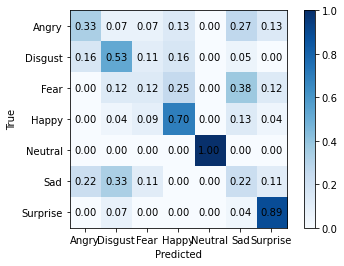

overall accuracy: 0.635593220338983


In [27]:

labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
# load the pre-trained model
model = tf.keras.models.load_model('../models/mck_best')

# load the dataset
test_set='../datasets/M-CK+_cropped/test'
x, y = get_data(test_set)
truth=y
y = to_categorical(y).reshape(y.shape[0], -1)


# make predictions on the test set
prediction=model.predict(x)
prediction=tf.argmax(prediction, axis=1)


# compute the confusion_matrix
confusion_matrix_ck=confusion_matrix(truth, prediction)
# Calculate the total sample size for each category
class_totals = np.sum(confusion_matrix_ck, axis=1)
# Normalise the confusion matrix to a range between 0 and 1
confusion_matrix_ck = confusion_matrix_ck / class_totals[:, np.newaxis]


# Visualize the confusion matrix
plt.imshow(confusion_matrix_ck, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, "{:.2f}".format(confusion_matrix_ck[i, j]), ha='center', va='center')

        
print('confusion_matrix on M-CK+ :')
plt.show()
print('overall accuracy:',np.mean(prediction == truth))